In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [3]:
# Load the file
who_csv = Path('../Project 1 - Group 3/Resources/WHO-COVID-19-global-data.csv')
layoff_csv = Path('../Project 1 - Group 3/Resources/layoff_2021.csv')
quit_csv = Path('../Project 1 - Group 3/Resources/quit_2021.csv')

# Read data sets for new deaths, layoffs, and voluntary withdrawl
who_data = pd.read_csv(who_csv)
layoff_data = pd.read_csv(layoff_csv)
quit_data = pd.read_csv(quit_csv)


Start Work on Labor Bureau Statistics

In [17]:
# Clean up labor data of layoffs to show only 2021
layoff_data_2021 = layoff_data[layoff_data['Year']==2021]

# Clean up labor data to include only period and value
layoff_data_2021 = layoff_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff/quit by the thousand
layoff_data_2021 = layoff_data_2021.rename(columns={'Period':'Month', 'Value':'Layoff'})

# Change data to represent actual value vs. per 100000
layoff_data_2021['Layoff'] = layoff_data_2021['Layoff']*1000

# Find the total amount of people who were terminated
layoff_data_2021['Layoff'].sum()


18989000

In [18]:
# Clean up labor data for quitting to show only 2021
quit_data_2021 = quit_data[quit_data['Year']==2021]


# Clean up labor data for quitting to include only period and value
quit_data_2021 = quit_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff/quit by the thousand
quit_data_2021 = quit_data_2021.rename(columns={'Period':'Month', 'Value':'Quit'})

quit_data_2021['Quit'] = quit_data_2021['Quit']*1000

# Find the total number of people who left their jobs
quit_data_2021['Quit'].sum()


9629000

In [6]:
# Show only the layoff/quit per thousand
layoff_data_2021 = layoff_data_2021[['Layoff']]
quit_data_2021 = quit_data_2021[['Quit']]

# Reset the index so we can merge the csv later on
layoff_data_2021 = layoff_data_2021.reset_index(drop=True)
quit_data_2021 = quit_data_2021.reset_index(drop=True)



In [7]:
# Merge the two csv on index
merge_labor_df = pd.merge(layoff_data_2021, quit_data_2021, left_index=True, right_index=True)

Start Work on WHO Data

In [8]:
# Set 'Date_reported' as the index
who_data = who_data.set_index('Date_reported')

# Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)

In [9]:
# Convert the index to datetime format in individual columns
who_data.index=pd.to_datetime(who_data.index)
who_data['Year'] = who_data.index.year
who_data['Month'] = who_data.index.month
who_data['Day'] = who_data.index.day


who_data.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7


In [10]:
# Isolate data on the US
us_new_deaths = who_data[who_data['Country']=='United States of America']


In [11]:
# Create a new dataframe with only 2021 for the U.S.
us_newdeath_2021 = us_new_deaths[us_new_deaths['Year']==2021]

In [12]:
# Group by month and get the sum of new deaths and reset index
us_months = us_newdeath_2021.groupby('Month')['New_deaths'].sum()
us_months = us_months.reset_index(drop=True)


In [13]:
# Merge WHO data and Labor data
final_df = pd.merge(merge_labor_df, us_months, left_index = True, right_index=True)

# Print to check 
print(final_df)

     Layoff    Quit  New_deaths
0   2705000  654000      100119
1   2259000  707000       67730
2   2086000  769000       33397
3   2072000  819000       20768
4   1829000  786000       17442
5   1814000  944000        9459
6   1220000  926000        9045
7   1213000  827000       31496
8   1094000  789000       54691
9   1026000  844000       48578
10   870000  839000       31309
11   801000  725000       43017


In [14]:
# Insert new column with months 
new_col_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
final_df['Months'] = new_col_months

# Move the month column to the left
reordered_column = ['Months', 'New_deaths', 'Layoff', 'Quit']
final_df = final_df[reordered_column]

# Rename 'New_deaths' to New Deaths
final_df = final_df.rename(columns={'New_deaths' : 'New Deaths'})

final_df = final_df.set_index('Months')

final_df

,New Deaths,Layoff,Quit
Months,,,
Jan,100119,2705000,654000
Feb,67730,2259000,707000
Mar,33397,2086000,769000
Apr,20768,2072000,819000
May,17442,1829000,786000
Jun,9459,1814000,944000
Jul,9045,1220000,926000
Aug,31496,1213000,827000
Sept,54691,1094000,789000


In [23]:
# Find the correlation between layoffs and quitting
correlations_layoff_quit = final_df['Layoff'].corr(final_df['Quit'])
print('Correlation between Layoff and Quit:', correlations_layoff_quit)

# Find the correlation between new deaths and quitting
correlations_death_quit = final_df['New Deaths'].corr(final_df['Quit'])
print('Correlation between new deaths and those who quit: ', correlations_death_quit )

# Find the correlation between new deaths and layoffs
correlations_death_layoff = final_df['New Deaths'].corr(final_df['Layoff'])
print('Correlation bewtween new deaths and those terminated: ', correlations_death_layoff)



Correlation between Layoff and Quit: -0.42889887147028166
Correlation between new deaths and those who quit:  -0.8220391837003147
Correlation bewtween new deaths and those terminated:  0.37232876940550313


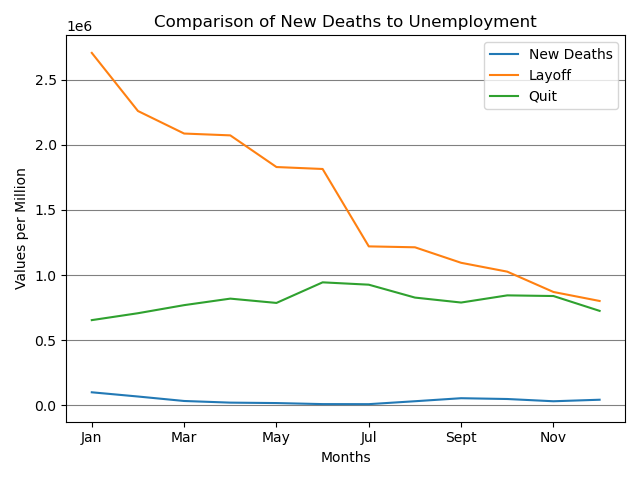

In [15]:
# Plot the line graph
final_df.plot(kind='line', alpha = .99)
plt.title('Comparison of New Deaths to Unemployment')
plt.ylabel('Values per Million')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")

# Save the graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Line Graph')

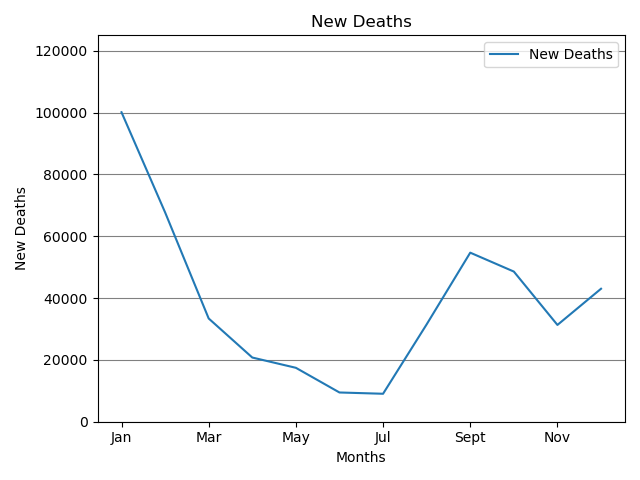

In [16]:
# Plot the line graph with a lower y-axis limit to show new death trends
unemployment_df = final_df[['New Deaths']]
unemployment_df.plot(kind='line', alpha = .99)
plt.title('New Deaths')
plt.ylabel('New Deaths')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")
plt.ylim(0, 125000)
# Save the graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Line Graph2')